In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [5]:
df=pd.read_csv("liver.csv")

In [7]:
df.head()

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [9]:
df=pd.read_csv("liver.csv",header=None)
df 

,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [11]:
column_name=["Age","Gender","Total_bilirubin","Direct_bilirubin","Alkaline_phosphotase","Alamine_Aminotransferase","Aspartate_Aminotransferase","Total_Protiens","Albumin","Albumin_and_Globulin_Ratio","Target"]

In [13]:
df.columns=column_name

In [15]:
df.head()

,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [17]:
#we have Target so this is supervised binary classification problm


In [21]:
df.shape

(583, 11)

In [23]:
df.columns

Index(['Age', 'Gender', 'Total_bilirubin', 'Direct_bilirubin',
       'Alkaline_phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [29]:
df.describe()

,Age,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [33]:
#EDA
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_bilirubin             583 non-null    float64
 3   Direct_bilirubin            583 non-null    float64
 4   Alkaline_phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


distribution of Numerical Features

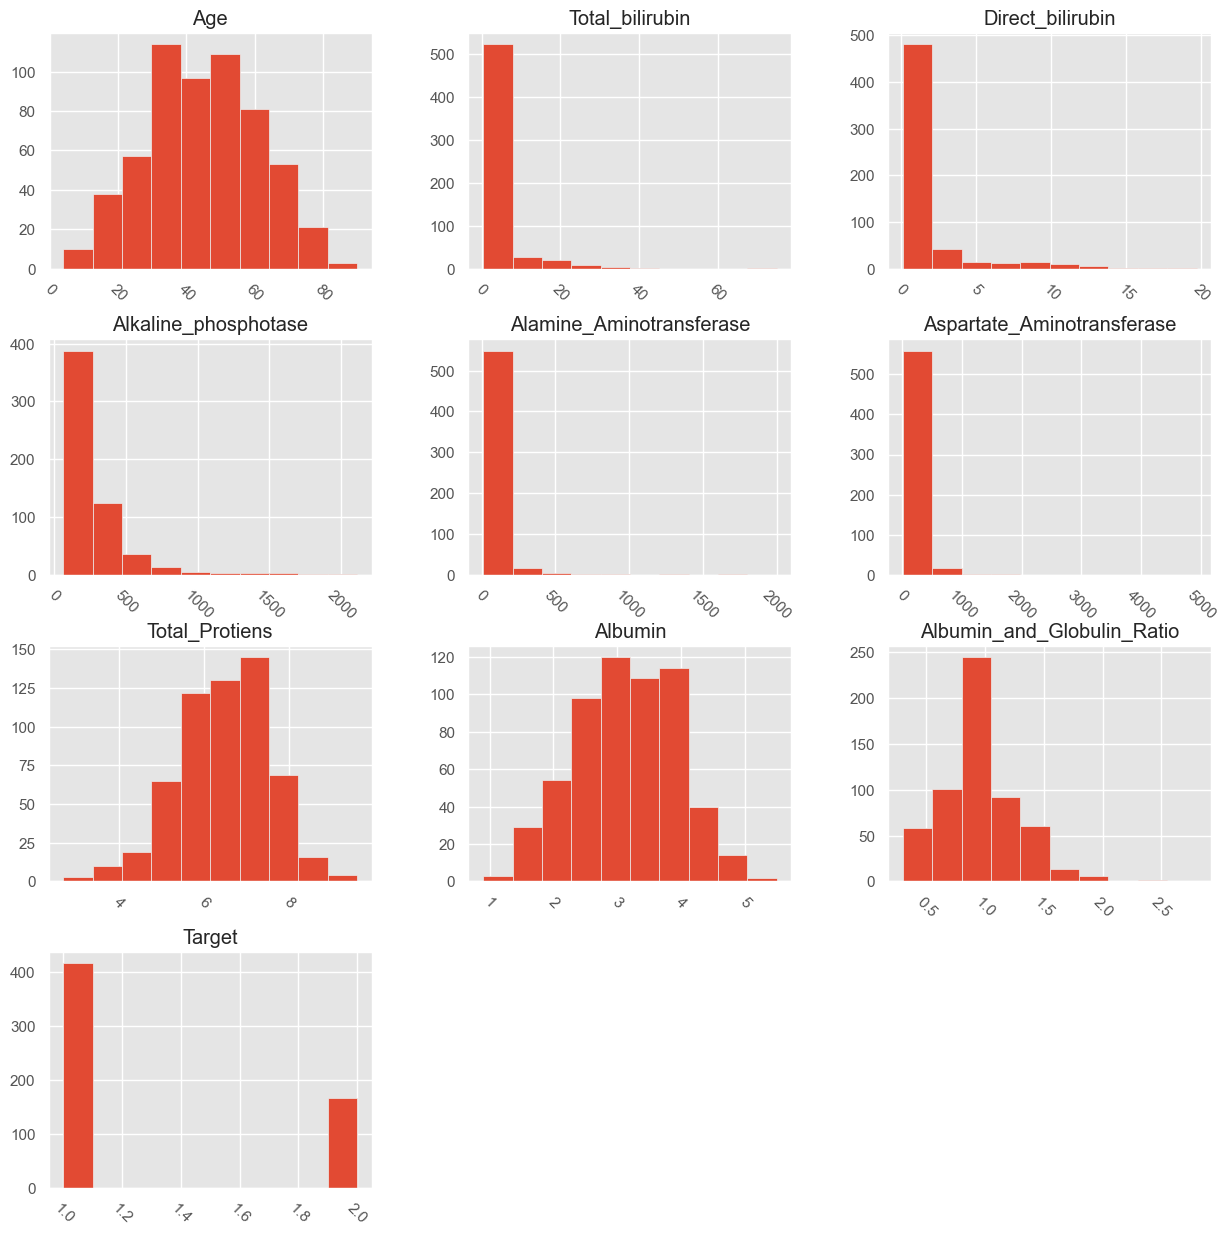

In [42]:
df.hist(figsize=(15,15), xrot=-45,bins=10)
plt.show()

In [54]:
def convertdataset(x):
    if x==2:
        return 0
    return 1
df['Target']=df['Target'].map(convertdataset)

In [56]:
df.head()

,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [60]:
df.Target.value_counts()

Target
1    416
0    167
Name: count, dtype: int64

In [62]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


In [64]:
#Barplot for categorical features

In [78]:
df[df['Gender'] == 'Male'][['Target','Gender']].head()

,Target,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


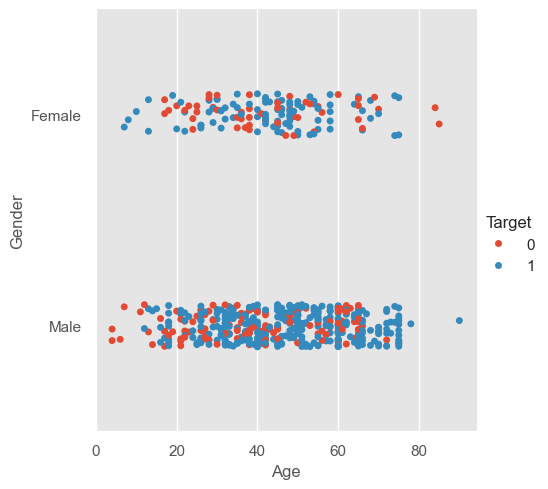

In [98]:
sns.catplot(x="Age", y="Gender", hue="Target", data=df, kind="strip")
plt.show()



In [ ]:
# Visualizing Age distribution across Gender with Target differentiation.
# No strong separation observed between Target groups.

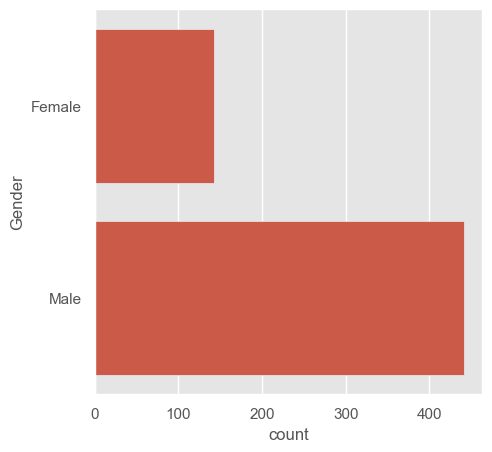

In [72]:
plt.figure(figsize=(5, 5)) 
sns.countplot(y='Gender', data=df)  
plt.show()  


In [ ]:
# Gender count distribution shows more Males than Females (~2:1 ratio).
# Potential dataset imbalance that might impact analysis or modeling.


In [100]:
df['Gender'].value_counts()

Gender
Male      441
Female    142
Name: count, dtype: int64

In [102]:
# Categorical Value Handling
def convertgender(x):
    if x== 'Male':
        return 0
    else:
        return 1
df['Gender'] = df['Gender'].map(convertgender)

In [104]:
df.head()

,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [106]:
df.corr()

,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


In [108]:
# Positive Correlation-> one feature increases other also increases
# Negative Correlation-> one feature increases other decreases
# closer to 0-> weak relationship

<Axes: >

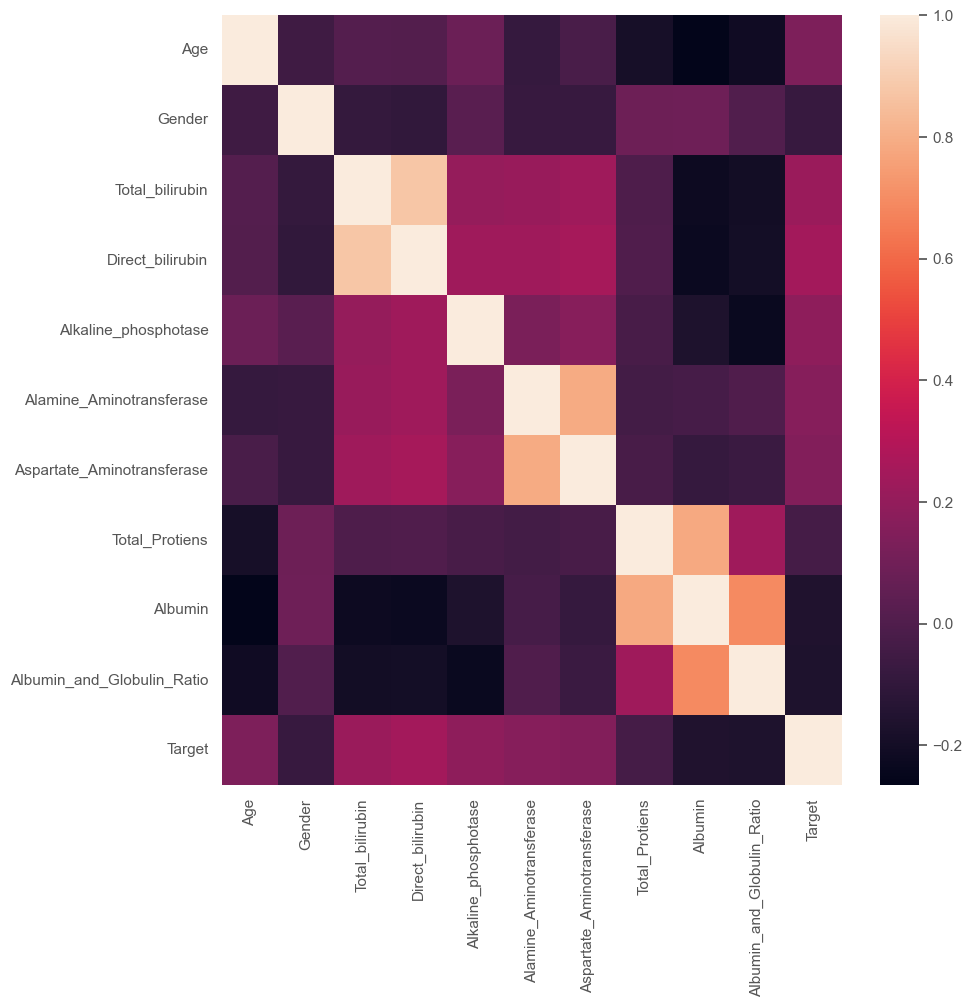

In [110]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

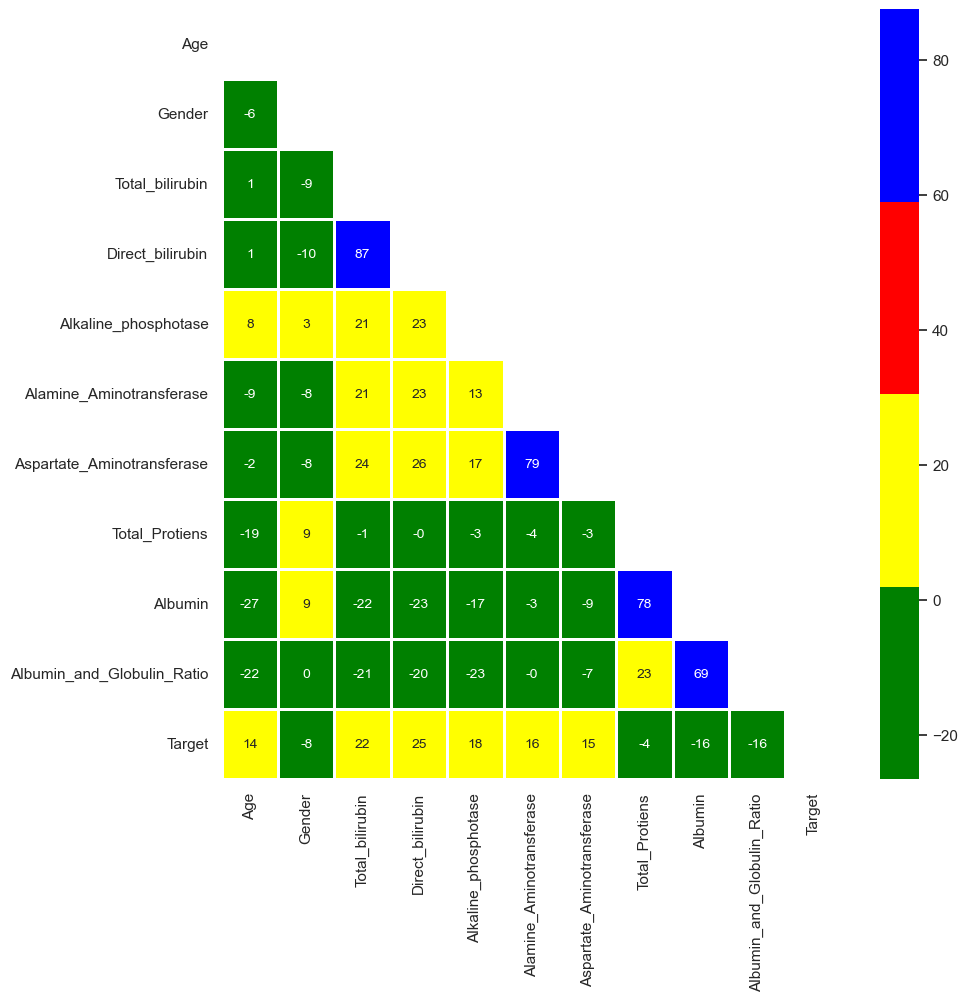

In [112]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt = ".0f", annot=True, lw=1, cmap=ListedColormap(['green','yellow','red','blue']))

In [114]:
df = df.drop_duplicates()

In [116]:
df.shape

(570, 11)

In [118]:
# Removing Outlier

In [120]:
df.columns

Index(['Age', 'Gender', 'Total_bilirubin', 'Direct_bilirubin',
       'Alkaline_phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

<Axes: ylabel='Aspartate_Aminotransferase'>

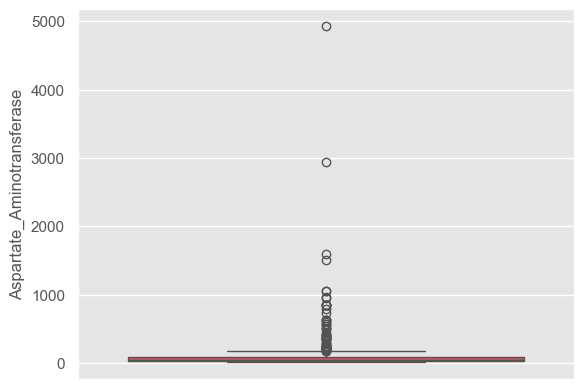

In [122]:
sns.boxplot(df.Aspartate_Aminotransferase)

<Axes: ylabel='Total_bilirubin'>

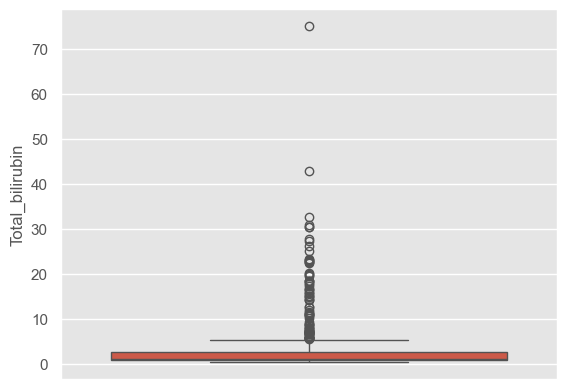

In [126]:
sns.boxplot(df.Total_bilirubin)

In [128]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()


135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [130]:
df = df[df.Aspartate_Aminotransferase<=3000]


In [132]:
df.shape


(569, 11)

In [134]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()


117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [136]:
df = df[df.Aspartate_Aminotransferase<=2500]


In [138]:
df.shape


(568, 11)

In [140]:
df.isnull().sum()


Age                           0
Gender                        0
Total_bilirubin               0
Direct_bilirubin              0
Alkaline_phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [142]:
df = df.dropna(how='any')


In [146]:
df.head()

,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [148]:
df.shape


(564, 11)

In [150]:
# Machine Learning Model
# Data Preparation

In [158]:
y=df.Target
X=df.drop('Target', axis=1)

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [162]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0, stratify=y)


In [164]:
# Data Standardization
train_mean = X_train.mean()
train_std = X_train.std()

In [166]:
X_train = (X_train - train_mean) / train_std
X_train.describe()

,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02
mean,1.083144e-16,7.877414e-17,-1.969353e-17,-3.938707e-17,-1.270233e-16,2.757095e-17,-3.544836e-17,-1.398241e-16,1.851192e-16,-7.483543e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.568370e+00,-5.468521e-01,-4.545818e-01,-4.862972e-01,-9.633546e-01,-4.150881e-01,-4.880241e-01,-3.301461e+00,-2.789562e+00,-2.079954e+00
25%,-7.747074e-01,-5.468521e-01,-3.928717e-01,-4.516441e-01,-4.787490e-01,-3.330804e-01,-4.080816e-01,-6.720731e-01,-7.673117e-01,-7.705468e-01
50%,2.934809e-02,-5.468521e-01,-3.620167e-01,-4.169909e-01,-3.259454e-01,-2.573809e-01,-3.167187e-01,5.327531e-02,-8.967850e-03,-1.763780e-02
75%,8.952540e-01,-5.468521e-01,-1.151762e-01,-7.045893e-02,5.169765e-02,-9.967374e-02,-7.974627e-02,6.879552e-01,8.125713e-01,5.388602e-01
max,2.441515e+00,1.824593e+00,1.105435e+01,6.305729e+00,7.973471e+00,1.011975e+01,8.585452e+00,2.773332e+00,2.392454e+00,5.121785e+00


In [168]:
X_test = (X_test - train_mean) / train_std
X_test.describe()

,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,-0.201633,0.166680,-0.029574,-0.022619,0.166349,-0.035753,-0.004175,0.245043,0.249406,0.208901
std,1.019796,1.092491,0.833443,0.911646,1.288436,0.912202,0.926675,0.912073,1.013153,1.199502
min,-2.382818,-0.546852,-0.423727,-0.486297,-0.627187,-0.408780,-0.493734,-3.392130,-2.789562,-1.752602
25%,-0.836558,-0.546852,-0.392872,-0.451644,-0.443822,-0.326772,-0.402371,-0.218730,-0.388140,-0.737812
50%,-0.094353,-0.546852,-0.362017,-0.382338,-0.339043,-0.257381,-0.316719,0.325281,0.370204,0.211508
75%,0.462301,1.824593,-0.084321,-0.105112,0.136831,-0.087057,-0.025500,0.778624,1.002157,0.866212
max,2.750767,1.824593,3.757133,3.914658,6.401777,7.407188,5.444853,2.864000,3.024408,6.103840


In [170]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [172]:
y_pred = lr.predict(X_test)

In [174]:
print(accuracy_score(y_train, lr.predict(X_train)))
lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(lr_acc)
print(confusion_matrix(y_test, lr.predict(X_test)))
print(classification_report(y_test, lr.predict(X_test)))

0.7117516629711752
0.7699115044247787
[[11 21]
 [ 5 76]]
              precision    recall  f1-score   support

           0       0.69      0.34      0.46        32
           1       0.78      0.94      0.85        81

    accuracy                           0.77       113
   macro avg       0.74      0.64      0.66       113
weighted avg       0.76      0.77      0.74       113



In [176]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [178]:
knn.predict(X_test)
 

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1], dtype=int64)

In [180]:
print(accuracy_score(y_train, lr.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)
print(confusion_matrix(y_test, knn.predict(X_test)))
print(classification_report(y_test, knn.predict(X_test)))

0.7117516629711752
0.6637168141592921
[[16 16]
 [22 59]]
              precision    recall  f1-score   support

           0       0.42      0.50      0.46        32
           1       0.79      0.73      0.76        81

    accuracy                           0.66       113
   macro avg       0.60      0.61      0.61       113
weighted avg       0.68      0.66      0.67       113



In [182]:
svc= SVC(probability=True)
parameters = {
    'gamma':[0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20, 30]
}
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20, 30],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [184]:
grid_search.best_params_

{'C': 0.01, 'gamma': 0.0001}

In [186]:
grid_search.best_score_

0.7117460317460318

In [188]:
svc= SVC(C=0.01, gamma=0.0001,probability=True)
svc.fit(X_train, y_train)

SVC(C=0.01, gamma=0.0001, probability=True)

In [190]:
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)
print(confusion_matrix(y_test, svc.predict(X_test)))
print(classification_report(y_test, svc.predict(X_test)))

0.7117516629711752
0.7168141592920354
[[ 0 32]
 [ 0 81]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.72      1.00      0.84        81

    accuracy                           0.72       113
   macro avg       0.36      0.50      0.42       113
weighted avg       0.51      0.72      0.60       113



In [192]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [194]:
print(accuracy_score(y_train, dtc.predict(X_train)))
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)
print(confusion_matrix(y_test, dtc.predict(X_test)))
print(classification_report(y_test, dtc.predict(X_test)))

1.0
0.6017699115044248
[[16 16]
 [29 52]]
              precision    recall  f1-score   support

           0       0.36      0.50      0.42        32
           1       0.76      0.64      0.70        81

    accuracy                           0.60       113
   macro avg       0.56      0.57      0.56       113
weighted avg       0.65      0.60      0.62       113



In [196]:
grid_parameter = {
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,10,12,15],
    'splitter':['best','random'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['auto','sqrt','log2']
}
grid_seach_dt = GridSearchCV(dtc, grid_parameter, cv=24, n_jobs=-1, verbose=1)
grid_seach_dt.fit(X_train, y_train)

Fitting 24 folds for each of 1800 candidates, totalling 43200 fits


GridSearchCV(cv=24, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 12, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [197]:
grid_seach_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 7,
 'min_samples_split': 7,
 'splitter': 'best'}

In [198]:
grid_seach_dt.best_score_

0.736111111111111

In [202]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt', min_samples_leaf=7, min_samples_split=3, splitter='best')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_leaf=7, min_samples_split=3)

In [204]:
print(accuracy_score(y_train, dtc.predict(X_train)))
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)
print(confusion_matrix(y_test, dtc.predict(X_test)))
print(classification_report(y_test, dtc.predict(X_test)))

0.7560975609756098
0.7168141592920354
[[11 21]
 [11 70]]
              precision    recall  f1-score   support

           0       0.50      0.34      0.41        32
           1       0.77      0.86      0.81        81

    accuracy                           0.72       113
   macro avg       0.63      0.60      0.61       113
weighted avg       0.69      0.72      0.70       113



In [206]:
# Random  Forest

In [208]:
rand_clf = RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75, min_samples_leaf=7, min_samples_split=3, n_estimators = 130)

In [210]:
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=7, min_samples_split=3,
                       n_estimators=130)

In [212]:
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(rand_clf_acc)
print(confusion_matrix(y_test, rand_clf.predict(X_test)))
print(classification_report(y_test, rand_clf.predict(X_test)))

0.9068736141906873
0.6814159292035398
[[10 22]
 [14 67]]
              precision    recall  f1-score   support

           0       0.42      0.31      0.36        32
           1       0.75      0.83      0.79        81

    accuracy                           0.68       113
   macro avg       0.58      0.57      0.57       113
weighted avg       0.66      0.68      0.67       113



In [214]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 20, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 20 folds for each of 32 candidates, totalling 640 fits


GridSearchCV(cv=20, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [216]:
grid_search_gbc.best_params_


{'learning_rate': 0.001, 'loss': 'exponential', 'n_estimators': 100}

In [218]:
grid_search_gbc.best_score_

0.7120553359683793

In [220]:
gbc = GradientBoostingClassifier(learning_rate=0.001, loss='exponential',n_estimators=100)
gbc.fit(X_train , y_train)

GradientBoostingClassifier(learning_rate=0.001, loss='exponential')

In [222]:
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(gbc_acc)
print(confusion_matrix(y_test, gbc.predict(X_test)))
print(classification_report(y_test, gbc.predict(X_test)))

0.7117516629711752
0.7168141592920354
[[ 0 32]
 [ 0 81]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.72      1.00      0.84        81

    accuracy                           0.72       113
   macro avg       0.36      0.50      0.42       113
weighted avg       0.51      0.72      0.60       113



In [224]:
# XGBoost
from xgboost import XGBClassifier

In [226]:
xgb = XGBClassifier(objective='binary:logistic', learning_rate = 0.001, max_depth = 100, n_estimators = 300)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.001, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=100, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [228]:
print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(xgb_acc)
print(confusion_matrix(y_test, xgb.predict(X_test)))
print(classification_report(y_test, xgb.predict(X_test)))

0.9379157427937915
0.6991150442477876
[[15 17]
 [17 64]]
              precision    recall  f1-score   support

           0       0.47      0.47      0.47        32
           1       0.79      0.79      0.79        81

    accuracy                           0.70       113
   macro avg       0.63      0.63      0.63       113
weighted avg       0.70      0.70      0.70       113



In [230]:
# Model Comparison

In [232]:
models = pd.DataFrame({
    'Model':['Logistic Regreesion','KNN', 'SVC', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifer', 'XgBoost'],
    'Score':[100*round(lr_acc, 4), 100*round(knn_acc, 4), 100*round(svc_acc, 4), 100*round(dtc_acc, 4), 100*round(rand_clf_acc, 4), 100*round(gbc_acc, 4),100*round(xgb_acc, 4)]
})

In [234]:
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regreesion,76.99
2,SVC,71.68
3,Decision Tree Classifier,71.68
5,Gradient Boosting Classifer,71.68
6,XgBoost,69.91
4,Random Forest Classifier,68.14
1,KNN,66.37


In [236]:
import pickle
model = lr_acc
pickle.dump(model, open("liver.pkl","wb"))

In [238]:
# 85%
# ANN

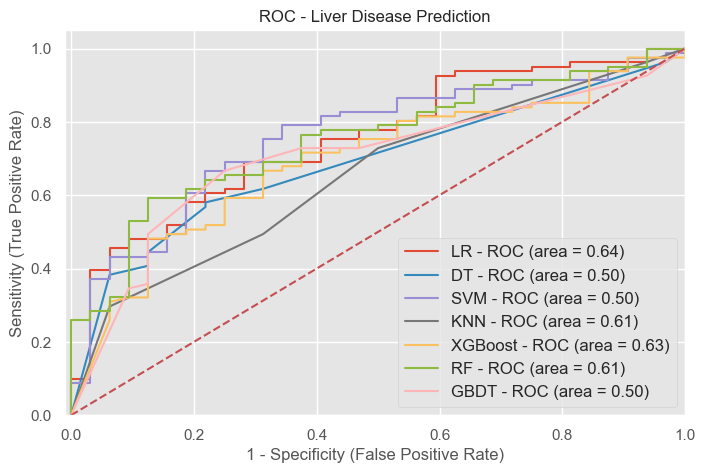

In [240]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Liver Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_liver.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
# Insight: Logistic Regression and XGBoost have the highest AUC (0.64 and 0.63), indicating strong performance for liver disease prediction. 
# Decision Tree, SVM, and GBDT show poor performance (AUC = 0.50), suggesting they may need tuning or replacement.


[76.99000000000001, 71.67999999999999, 71.67999999999999, 66.36999999999999, 69.91000000000001, 68.14, 71.67999999999999]
[64.1, 61.629999999999995, 50.0, 61.419999999999995, 62.94, 59.160000000000004, 50.0]


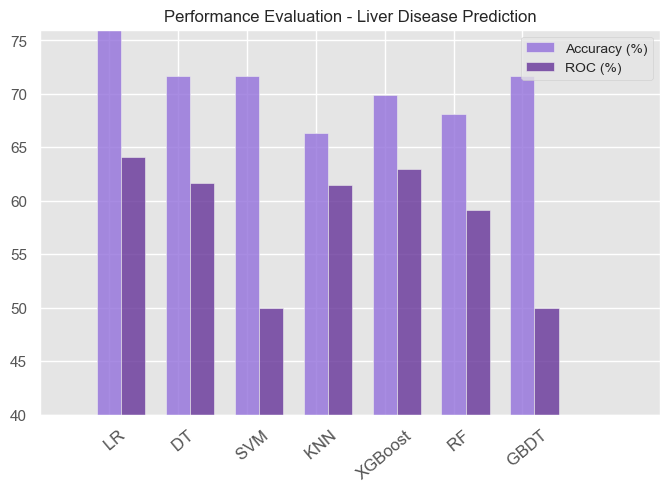

In [244]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
means_roc = []
means_accuracy = [100*round(lr_acc,4), 100*round(dtc_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4), 
                  100*round(rand_clf_acc,4), 100*round(gbc_acc,4)]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([40, 76])

plt.title('Performance Evaluation - Liver Disease Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_liver.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
#This graph compares the performance of different machine learning models in predicting liver disease using two metrics: Accuracy (%) and ROC (%) (Receiver Operating Characteristic).
#Logistic Regression or GBDT should be prioritized if high predictive performance is the main goal.